### Random forest
is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

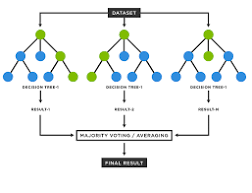

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
dir(digits)
#digits.image

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

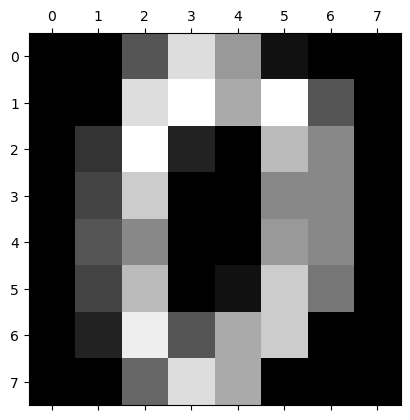

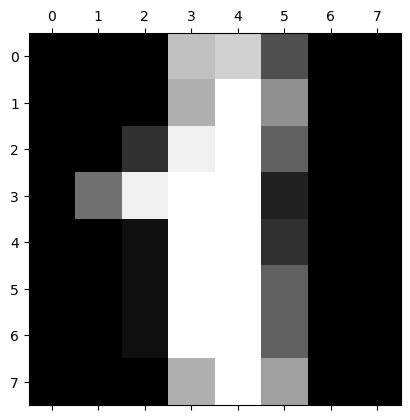

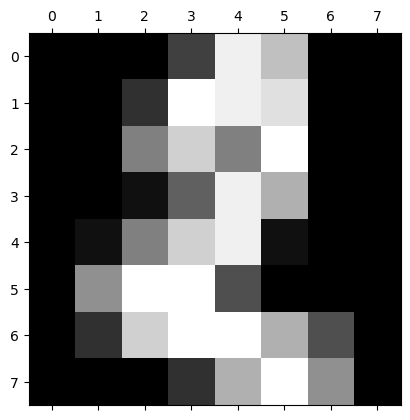

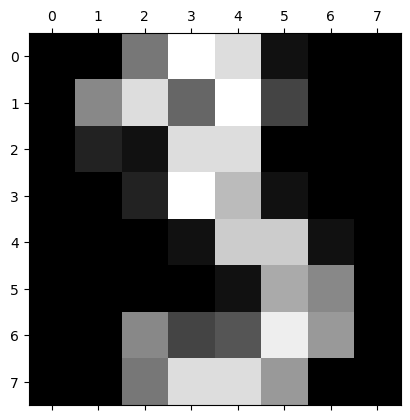

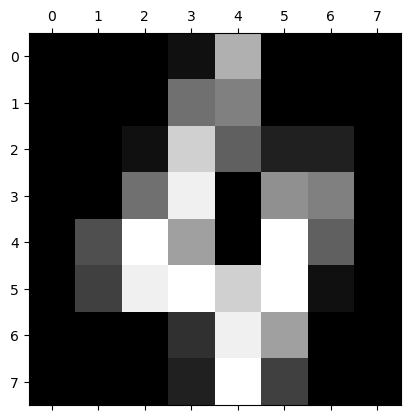

In [10]:
plt.gray()
for i in range(5):
	plt.matshow(digits.images[i])

In [11]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
x=df
y=digits.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier #ensemble is used when you are using multiple algorithm to predict the output
model = RandomForestClassifier(n_estimators=20) #n_estimators describes number of decision tree used to predict output
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [16]:
model.score(X_train, y_train)

1.0

In [19]:
model.predict(digits.data[[0]])

array([0])

In [20]:
(digits.target[[0]])

array([0])

In [21]:
y_predicted = model.predict(X_test)

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 31,  0],
       [ 1,  0,  0,  1,  1,  0,  0,  0,  2, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

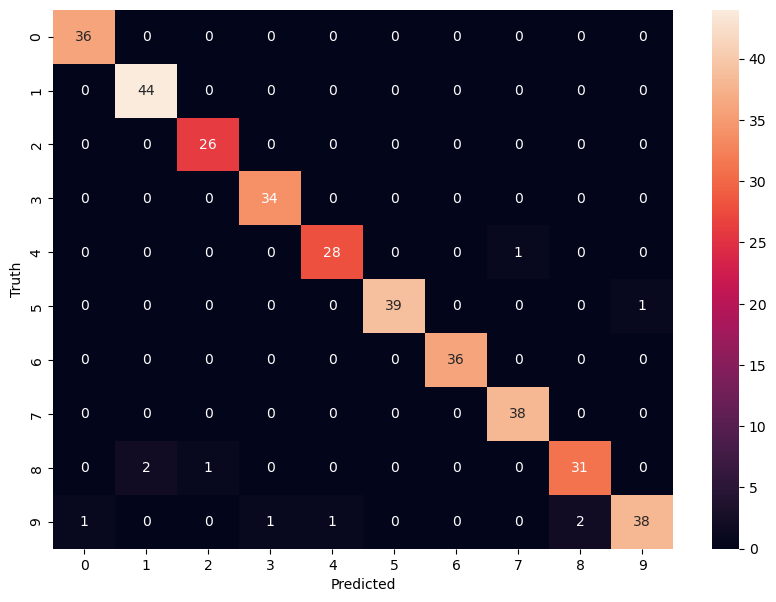

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')